In this note I will code the examples from the quantopian lecture https://www.quantopian.com/lectures/the-capital-asset-pricing-model-and-arbitrage-pricing-theory. Most of the idea comes from that notebook.

In [83]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import Fundamentals
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.research import run_pipeline,returns
from quantopian.pipeline.classifiers.fundamentals import Sector
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Construct pipeline. We consider all securities in tech sector (311). We will consider three factors:

purchase_of_business

research_and_development

operating_cash_flow (https://www.investopedia.com/terms/o/operatingcashflow.asp)

In [84]:
def make_pipeline():
    #factors
    purchase_of_biz=Fundamentals.purchase_of_business.latest
    rd=Fundamentals.research_and_development.latest
    operating_cash_flow = Fundamentals.operating_cash_flow.latest
    #rank
    purchase_of_biz_rank = purchase_of_biz.rank()
    rd_rank = rd.rank()
    operating_cash_flow_rank = operating_cash_flow.rank()
    
    sectors = Sector()
    initial_screen=(QTradableStocksUS()&sectors.eq(311))
    most_biz_bought = purchase_of_biz_rank.top(80,mask=initial_screen)
    least_biz_bought = purchase_of_biz_rank.bottom(80,mask=initial_screen)
    
    most_rd = rd_rank.top(80,mask=initial_screen)
    least_rd = rd_rank.bottom(80,mask=initial_screen)
    
    most_cash = operating_cash_flow_rank.top(80,mask=initial_screen)
    least_cash = operating_cash_flow_rank.bottom(80,mask=initial_screen)
    
    returns = Returns(window_length=2)
    pipe_screen=(most_biz_bought|least_biz_bought|most_rd|least_rd|most_cash|least_cash)
    pipe_columns = {
        'purchase_of_biz':purchase_of_biz,
        'rd': rd,
        'operating_cash_flow':operating_cash_flow,
        'purchase_of_biz_rank':purchase_of_biz_rank,
        'rd_rank': rd_rank,
        'operating_cash_flow_rank':operating_cash_flow_rank,
        'most_rd':most_rd,
        'least_rd':least_rd,
        'most_cash':most_cash,
        'least_cash':least_cash,
        'most_biz_bought':most_biz_bought,
        'least_biz_bought':least_biz_bought,
        'returns':returns
    }
    pipe=Pipeline(screen=initial_screen,columns=pipe_columns)
    return pipe

In [102]:
start_date = '2016-01-01'
end_date = '2016-12-31'

In [103]:
output=run_pipeline(make_pipeline(),start_date,end_date)
output

least_biz_bought least_cash  \
2016-01-04 00:00:00+00:00 Equity(24 [AAPL])                True      False   
                          Equity(67 [ADSK])                True      False   
                          Equity(110 [ACXM])              False      False   
                          Equity(114 [ADBE])               True      False   
                          Equity(122 [ADI])               False      False   
                          Equity(337 [AMAT])              False      False   
                          Equity(351 [AMD])               False       True   
                          Equity(465 [APH])                True      False   
                          Equity(538 [ARW])                True       True   
                          Equity(661 [AVT])               False       True   
                          Equity(856 [BHE])               False      False   
                          Equity(969 [BMI])                True       True   
                          Equity(1209 [CA])                True      False   
                          Equity(1218 [CACI])              True      False   
                          Equity(1244 [CAMP])             False      False   
                          Equity(1385 [CDNS])             False      False   
                          Equity(1419 [CERN])             False      False   
                          Equity(1460 [CGNX])             False      False   
                          Equity(1751 [COHR])             False      False   
                          Equity(1882 [CRUS])             False       True   
                          Equity(1898 [CSC])               True      False   
                          Equity(1900 [CSCO])              True      False   
                          Equity(2043 [CY])               False      False   
                          Equity(2100 [DBD])              False       True   
                          Equity(2185 [DIOD])             False      False   
                          Equity(2460 [EFII])              True      False   
                          Equity(2602 [EA])               False      False   
                          Equity(2837 [FICO])             False      False   
                          Equity(3203 [GIB])              False      False   
                          Equity(3241 [GLW])              False      False   
...                                                         ...        ...   
2017-01-03 00:00:00+00:00 Equity(47430 [MBLY])            False      False   
                          Equity(47752 [CDK])             False      False   
                          Equity(47779 [CYBR])             True      False   
                          Equity(47872 [HUBS])            False       True   
                          Equity(47912 [ZAYO])             True      False   
                          Equity(47921 [KEYS])            False      False   
                          Equity(48253 [NEWR])            False       True   
                          Equity(48257 [HDP])             False       True   
                          Equity(48384 [QRVO])            False      False   
                          Equity(48486 [BOX])             False       True   
                          Equity(48629 [INOV])            False      False   
                          Equity(48823 [SEDG])            False      False   
                          Equity(48863 [GDDY])             True      False   
                          Equity(49048 [BKI])             False      False   
                          Equity(49060 [SHOP])            False       True   
                          Equity(49100 [EVH])             False       True   
                          Equity(49139 [FIT])             False       True   
                          Equity(49156 [MB])               True       True   
                          Equity(49192 [ALRM])            False       True   
                          Equity(49208 [BW])              False      

# A three factor arbitrage pricing model

Construct three long-short portfolios based on ranking of three factors respectively

In [104]:
biz_pf=output[output['most_biz_bought']]['returns'].groupby(level=0).mean()-output[output['most_biz_bought']==0]['returns'].groupby(level=0).mean()

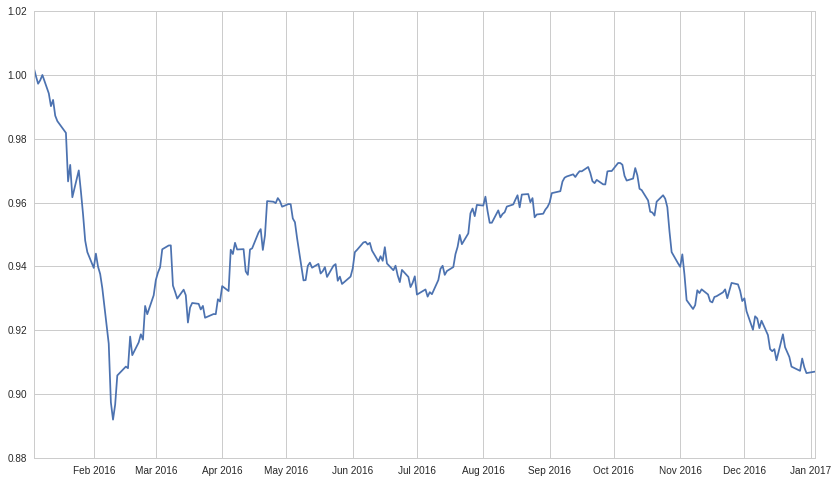

In [105]:
plt.figure()
plt.plot(np.cumprod(biz_pf+1))
plt.show()

In [106]:
cash_pf=output[output['most_cash']]['returns'].groupby(level=0).mean()-output[output['most_cash']==0]['returns'].groupby(level=0).mean()

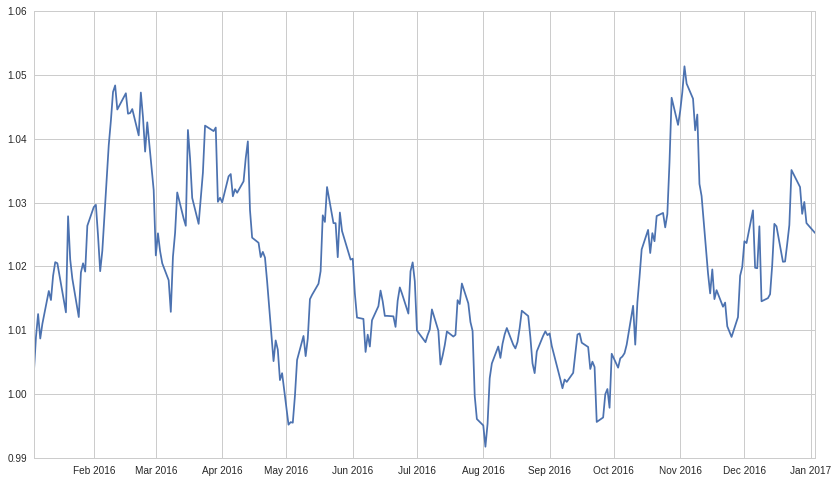

In [107]:
plt.figure()
plt.plot(np.cumprod(cash_pf+1))
plt.show()

In [108]:
rd_pf=output[output['most_rd']]['returns'].groupby(level=0).mean()-output[output['most_rd']==0]['returns'].groupby(level=0).mean()

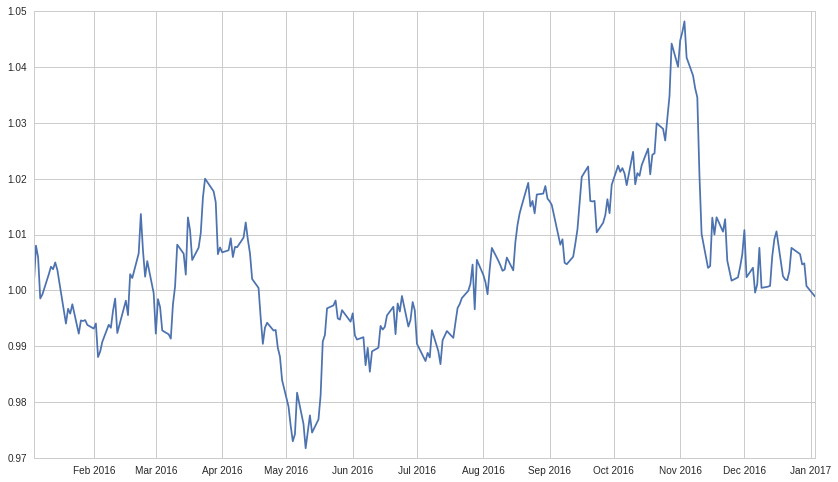

In [109]:
plt.figure()
plt.plot(np.cumprod(rd_pf+1))
plt.show()

risk free return

In [110]:
R_F = returns('BIL',  start=start_date, end=end_date)
risk_free=np.mean(R_F)

construct list of assets

In [111]:
assets_list = output.index.levels[1].unique()
len(assets_list)

350

Fama-Macbeth regressions:

First, for each asset $i$ fit the model $R_i=\beta_0+\beta_{i1}F_{i1}+\beta_{i2}F_{i2}+\beta_{i3}F_{i3}$ where $F$ are the return of one of three portfolios

In [112]:
beta=[]
expected_return=[]
x=np.column_stack((biz_pf,cash_pf,rd_pf))
x=sm.add_constant(x)
#this data is used for constructing portfolio later
data=pd.DataFrame(columns=['beta_biz','beta_cash','beta_rd'],index=assets_list)
for asset in assets_list:
    y=np.array(output.xs(asset,level=1)['returns'])
    # some security doesn't have data for a full year
    if len(y)==len(x):
        model=sm.OLS(y,x,hasconst=False)
        b=model.fit().params[1:]
        beta.append(b)
        expected_return.append(np.mean(y))
        data.loc[asset,'beta_biz']=b[0]
        data.loc[asset,'beta_cash']=b[1]
        data.loc[asset,'beta_rd']=b[2]
beta=np.array(beta)
beta=sm.add_constant(beta)
expected_return=np.array(expected_return)

Next, fit the model $E(R)=\lambda_0+\lambda_1\beta_1+\lambda_2\beta_2+\lambda_3\beta_3$. Using the $\beta$ and average returns of each asset as input data

In [113]:
model=sm.OLS(expected_return,beta,hasconst=False)
lam=model.fit()
lam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     44.09
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           3.72e-28
Time:                        05:25:50   Log-Likelihood:                 1406.3
No. Observations:                 261   AIC:                            -2805.
Df Residuals:                     257   BIC:                            -2790.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0009      0.000      6.101      0.000         0.001     0.001
x1            -0.0008   9.12e-05     -8.610      0.000        -0.001    -0.001
x2            -0.0001      0.000     -1.266      0.207        -0.000  7.44e-05
x3             0.0002      0.000      1.834      0.068     -1.37e-05     0.000
==============================================================================
Omnibus:                       26.312   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.720
Skew:                          -0.399   Prob(JB):                     9.82e-17
Kurtosis:                       5.479   Cond. No.                         6.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Construct portfolio

In [114]:
apt=data['beta_biz']*lam.params[1]+data['beta_cash']*lam.params[2]+data['beta_rd']*lam.params[3]
apt.sort_values(inplace=True, ascending=False)
apt=apt.dropna()
apt

Equity(351 [AMD])        0.00326556
Equity(21374 [CRAY])     0.00102246
Equity(1751 [COHR])     0.000981361
Equity(6534 [ROG])      0.000951032
Equity(8344 [XLNX])     0.000905049
Equity(27780 [IRBT])    0.000881007
Equity(21666 [MRVL])     0.00087474
Equity(20526 [NTCT])    0.000837216
Equity(10192 [ITRI])    0.000820496
Equity(5107 [MTSC])     0.000747973
Equity(47208 [GPRO])    0.000743238
Equity(4248 [KLIC])     0.000731482
Equity(11718 [ADTN])    0.000700041
Equity(17718 [OSIS])    0.000693313
Equity(7372 [TECD])     0.000673501
Equity(33609 [SMCI])    0.000656307
Equity(21754 [ENTG])     0.00063269
Equity(20387 [VIAV])    0.000632176
Equity(5053 [MSCC])     0.000597466
Equity(337 [AMAT])      0.000591306
Equity(19909 [MKSI])    0.000591234
Equity(12116 [TSEM])    0.000579148
Equity(6041 [PLXS])     0.000533956
Equity(856 [BHE])       0.000523232
Equity(16820 [TTWO])    0.000513419
Equity(2100 [DBD])      0.000512029
Equity(12959 [DDD])     0.000503806
Equity(16945 [RMBS])    0.00

In [133]:
longs=apt.head(50).index
shorts=apt.tail(50).index

Testing the portfolio in sample. It's great

In [141]:
apt_pf=np.array([0]*252)
long_return=returns(longs,start='2016-1-1',end='2016-12-31')
short_return=returns(shorts,start='2016-1-1',end='2016-12-31')
for asset in longs:
    apt_pf=apt_pf+np.array(long_return[asset])
for asset in shorts:
    apt_pf=apt_pf-np.array(short_return[asset])
apt_pf=apt_pf/len(longs)

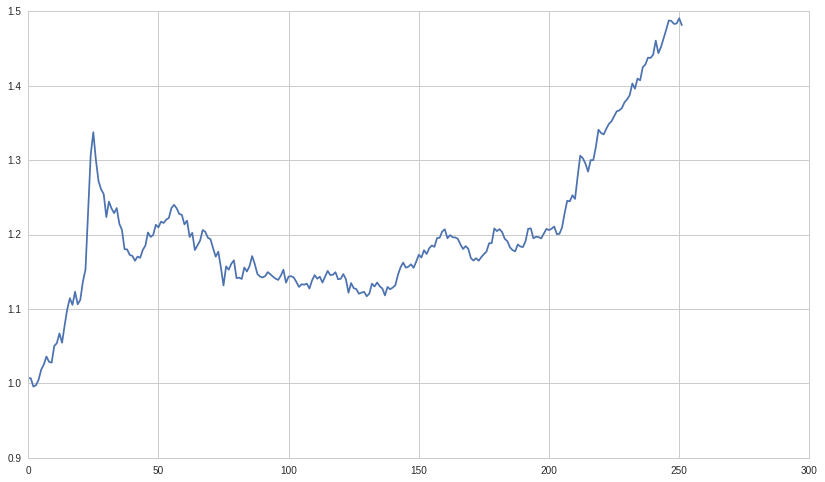

In [142]:
plt.figure()
plt.plot(np.cumprod(apt_pf+1))
plt.show()

Out of sample test

In [151]:
apt_pf=np.array([0]*251)
long_return=returns(longs,start='2017-1-1',end='2017-12-31')
long_return.fillna(0,inplace=True)
short_return=returns(shorts,start='2017-1-1',end='2017-12-31')
short_return.fillna(0,inplace=True)
for asset in longs:
    apt_pf=apt_pf+np.array(long_return[asset])
for asset in shorts:
    apt_pf=apt_pf-np.array(short_return[asset])
apt_pf=apt_pf/len(longs)

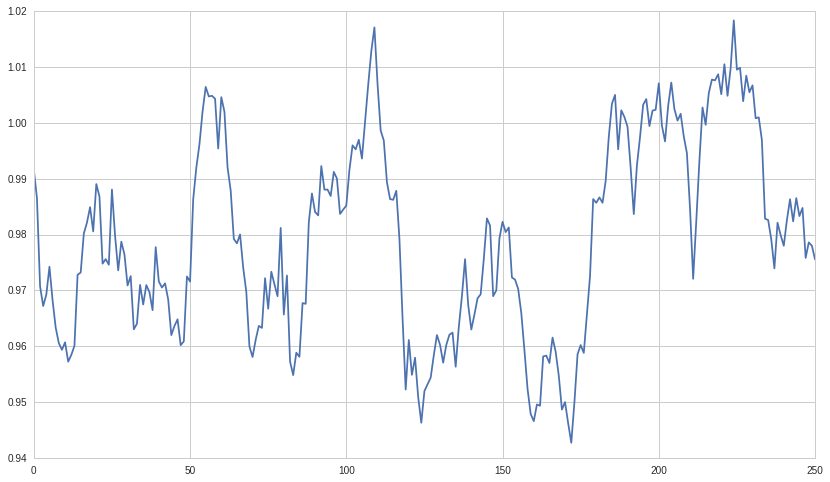

In [152]:
plt.figure()
plt.plot(np.cumprod(apt_pf+1))
plt.show()